# Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [50]:
pd.set_option("display.precision", 2)
df = pd.read_csv(r'Dataset\Student_performance_data _.csv')

In [51]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93,2.0
1,1002,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04,1.0
2,1003,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11,4.0
3,1004,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05,3.0
4,1005,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29,4.0


## Drop the Unnecessary Columns

In [52]:
df.drop(['StudentID','GradeClass'],axis=1,inplace=True)

In [53]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.83,7,1,2,0,0,1,0,2.93
1,18,0,0,1,15.41,0,0,1,0,0,0,0,3.04
2,15,0,2,3,4.21,26,0,2,0,0,0,0,0.11
3,17,1,0,3,10.03,14,0,3,1,0,0,0,2.05
4,17,1,0,2,4.67,17,1,3,0,0,0,0,1.29


# Exploratory Data Analysis (EDA)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


In [55]:
df.duplicated().sum()

0

**We have no missing or duplicated data**

In [56]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,2392.00,2392.00,2392.00,2392.00,2.39e+03,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00
mean,16.47,0.51,0.88,1.75,9.77e+00,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91
std,1.12,0.50,1.03,1.00,5.65e+00,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92
min,15.00,0.00,0.00,0.00,1.06e-03,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04e+00,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17
50%,16.00,1.00,0.00,2.00,9.71e+00,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89
75%,17.00,1.00,2.00,2.00,1.44e+01,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62
max,18.00,1.00,3.00,4.00,2.00e+01,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00


In [57]:
check_categoricals = df
for i in check_categoricals:
    print(f'the number of unique values in {i} is {df[i].nunique()}')

the number of unique values in Age is 4
the number of unique values in Gender is 2
the number of unique values in Ethnicity is 4
the number of unique values in ParentalEducation is 5
the number of unique values in StudyTimeWeekly is 2392
the number of unique values in Absences is 30
the number of unique values in Tutoring is 2
the number of unique values in ParentalSupport is 5
the number of unique values in Extracurricular is 2
the number of unique values in Sports is 2
the number of unique values in Music is 2
the number of unique values in Volunteering is 2
the number of unique values in GPA is 2371


seems like all the data is categorical except
- `StudyTimeWeekly`
- `Absences`

so we gonna drop them from the `check_categoricals`

In [58]:
check_categoricals = check_categoricals.drop(['StudyTimeWeekly','Absences'],axis=1)
check_categoricals.head()

,Age,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,1,2,0,0,1,0,2.93
1,18,0,0,1,0,1,0,0,0,0,3.04
2,15,0,2,3,0,2,0,0,0,0,0.11
3,17,1,0,3,0,3,1,0,0,0,2.05
4,17,1,0,2,1,3,0,0,0,0,1.29


To visualize the distribution of the data Lets return the data to its origins

In [59]:
check_categoricals['Gender'] = check_categoricals['Gender'].replace({0:'Male',1:'Female'})
check_categoricals['Ethnicity'] = check_categoricals['Ethnicity'].replace({0:'Caucasian', 1:'African American', 2:'Asian', 3:'Other'})
check_categoricals['ParentalEducation'] = check_categoricals['ParentalEducation'].replace({0:'None', 1:'High School', 2:'College', 3:'Bachelor\'s', 4:'Higher'})
check_categoricals['Tutoring'] = check_categoricals['Tutoring'].replace({0:'No',1:'Yes'})
check_categoricals['ParentalSupport'] = check_categoricals['ParentalSupport'].replace({0:'None', 1:'Low', 2:'Moderate', 3:'High', 4:'Very High'})
check_categoricals['Extracurricular'] = check_categoricals['Extracurricular'].replace({0:'No',1:'Yes'})
check_categoricals['Sports'] = check_categoricals['Sports'].replace({0:'No',1:'Yes'})
check_categoricals['Music'] = check_categoricals['Music'].replace({0:'No',1:'Yes'})
check_categoricals['Volunteering'] = check_categoricals['Volunteering'].replace({0:'No',1:'Yes'})

check_categoricals.head()


,Age,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,Female,Caucasian,College,Yes,Moderate,No,No,Yes,No,2.93
1,18,Male,Caucasian,High School,No,Low,No,No,No,No,3.04
2,15,Male,Asian,Bachelor's,No,Moderate,No,No,No,No,0.11
3,17,Female,Caucasian,Bachelor's,No,High,Yes,No,No,No,2.05
4,17,Female,Caucasian,College,Yes,High,No,No,No,No,1.29


# Visualizations

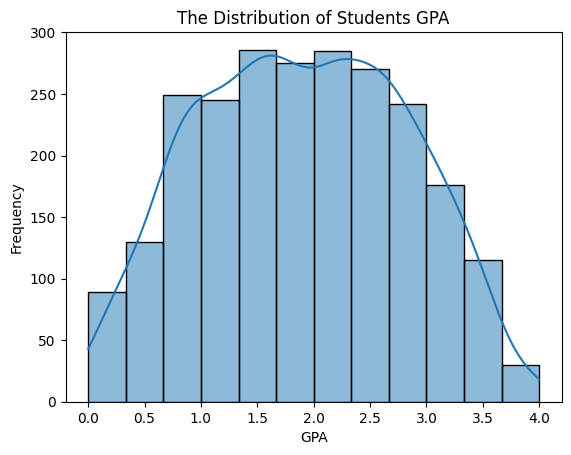

In [60]:
sns.histplot(x='GPA', data=df, kde=True, bins=12)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('The Distribution of Students GPA')
plt.show()

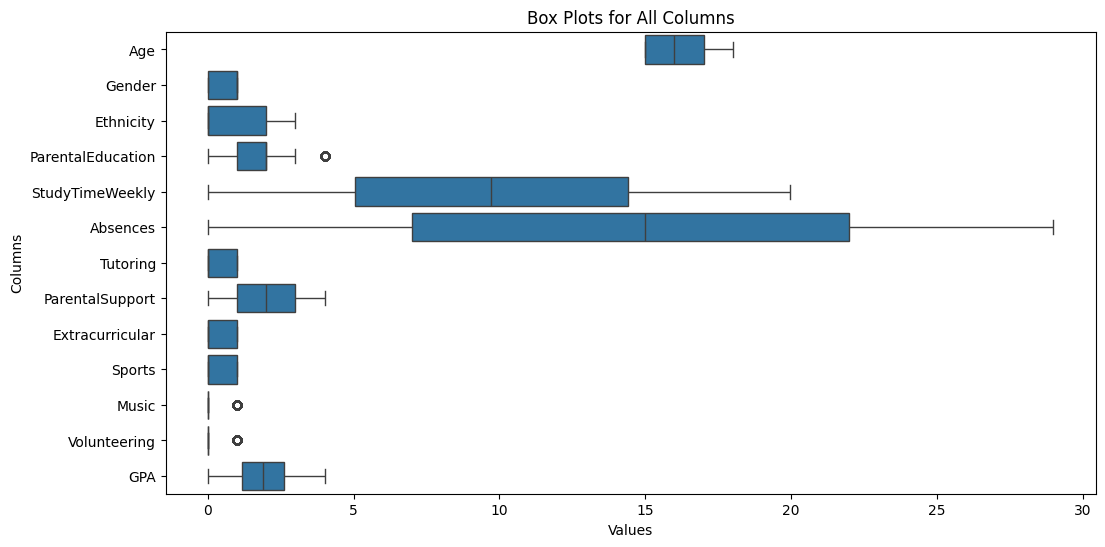

In [61]:
melted_data = df.melt(var_name="Column", value_name="Value")

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Value", y="Column", data=melted_data)
plt.title("Box Plots for All Columns")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

**The outlaiers is really small**

lets handle them (the 'Music'&'Volunteering' is a yes or no questions so we will skip them)

So we will work on the 'ParentalEducation' column

In [62]:

Q1 = df['ParentalEducation'].quantile(0.25)  # 25th percentile
Q3 = df['ParentalEducation'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                      # Interquartile range

# Calculate bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['ParentalEducation'] = df['ParentalEducation'].apply(
lambda x: upper_bound if x > upper_bound 
else lower_bound if x < lower_bound 
else x)


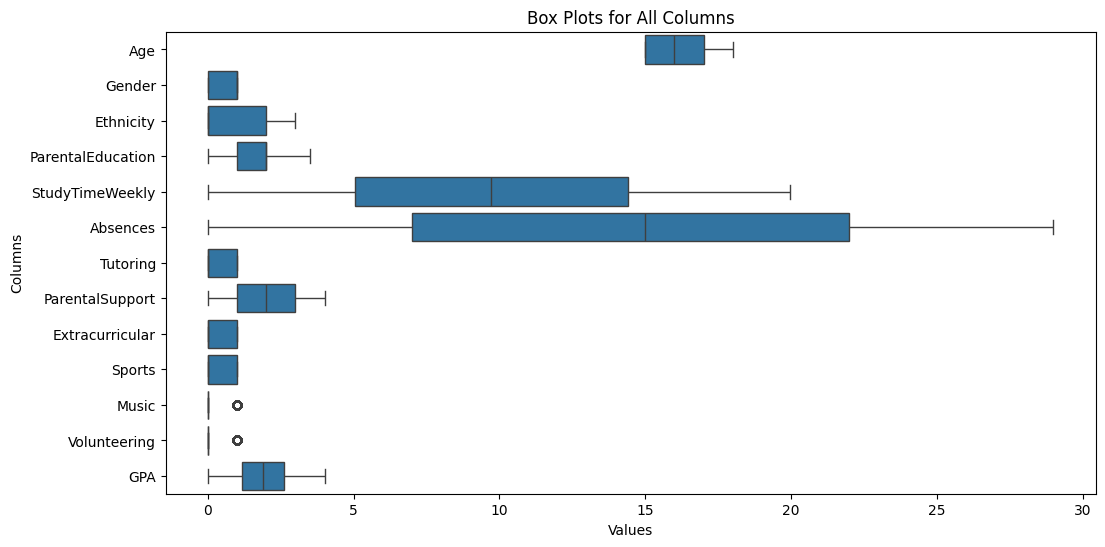

In [63]:
melted_data = df.melt(var_name="Column", value_name="Value")

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Value", y="Column", data=melted_data)
plt.title("Box Plots for All Columns")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

**Outlaiers handled**

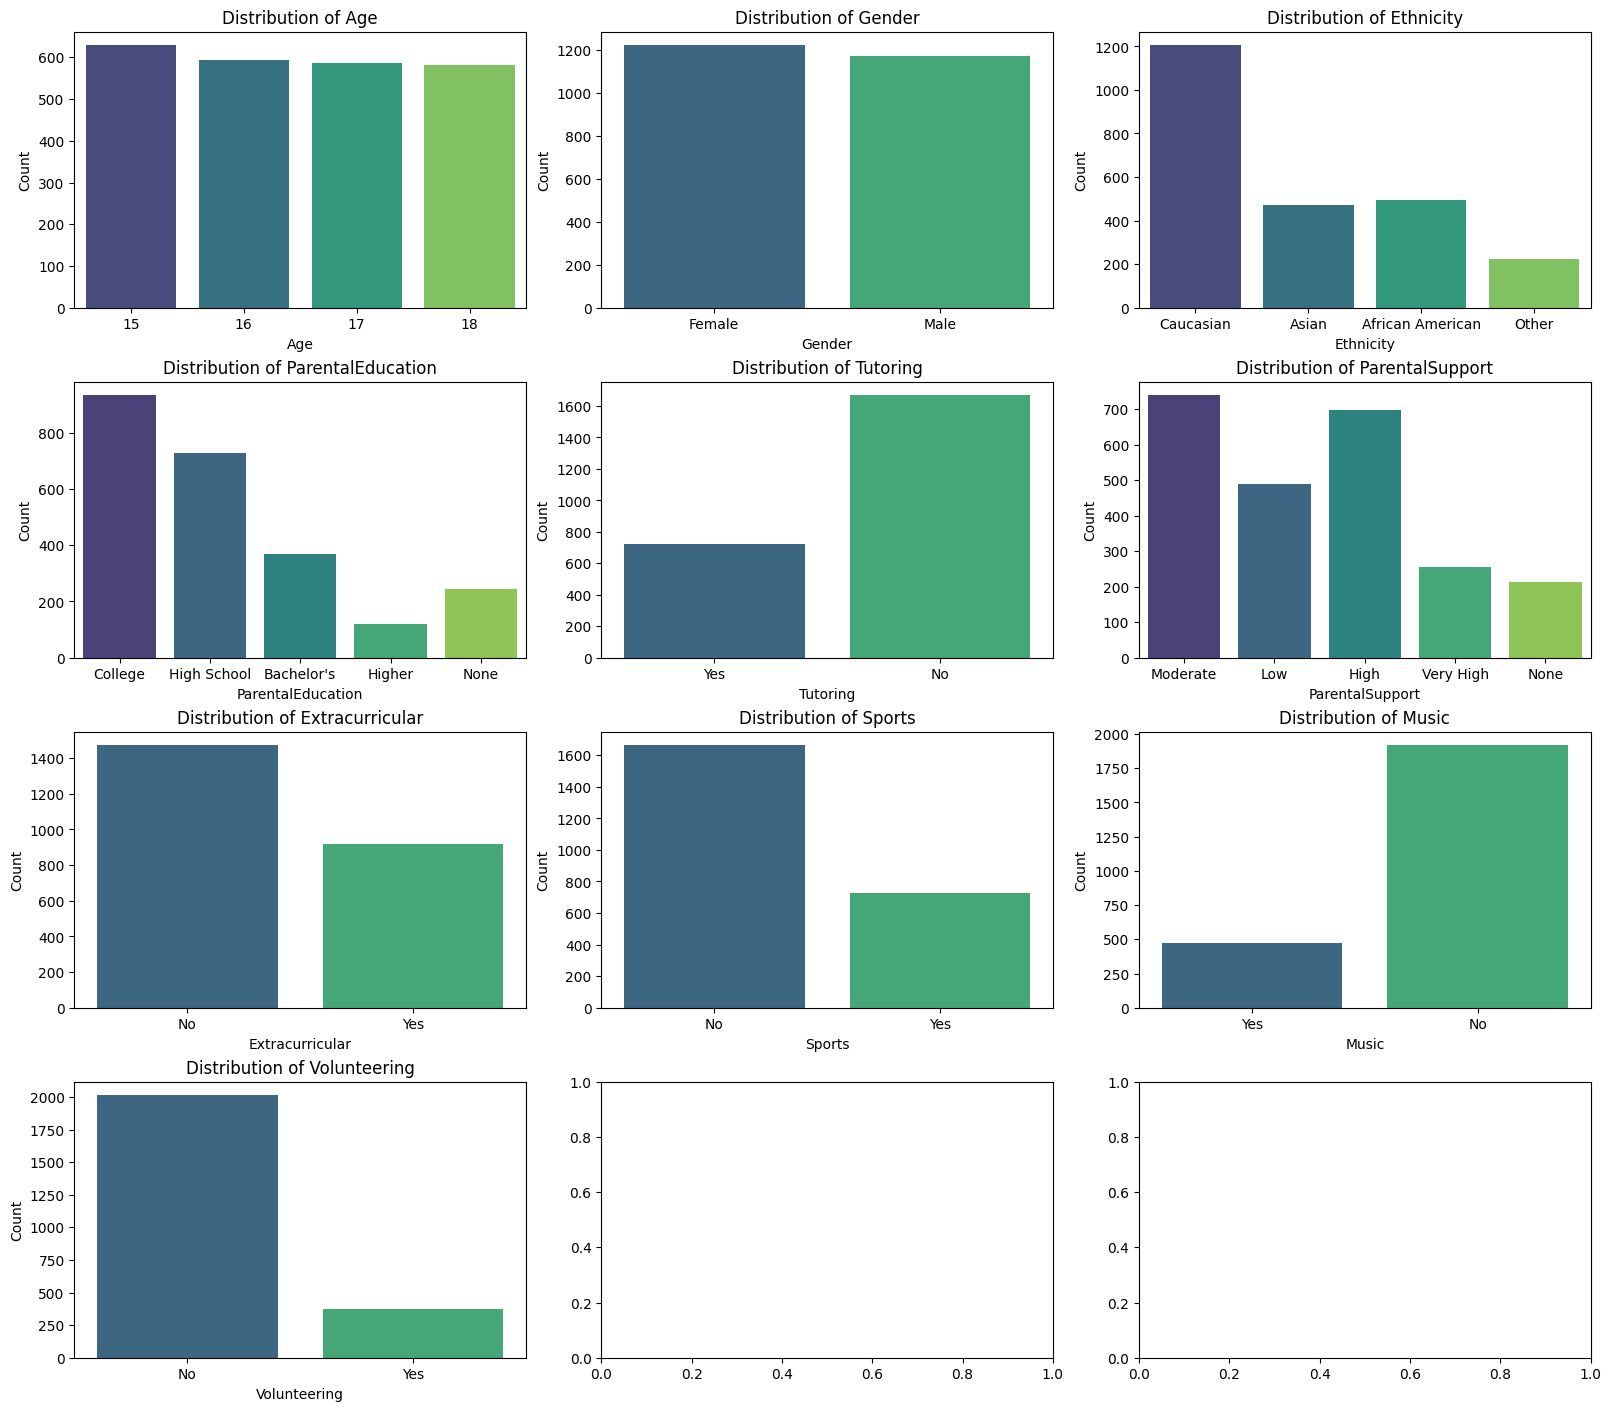

In [64]:
fig, axes = plt.subplots(4, 3, figsize=(16, 14), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(check_categoricals.columns.drop(['GPA'])):
    sns.countplot(data=check_categoricals, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

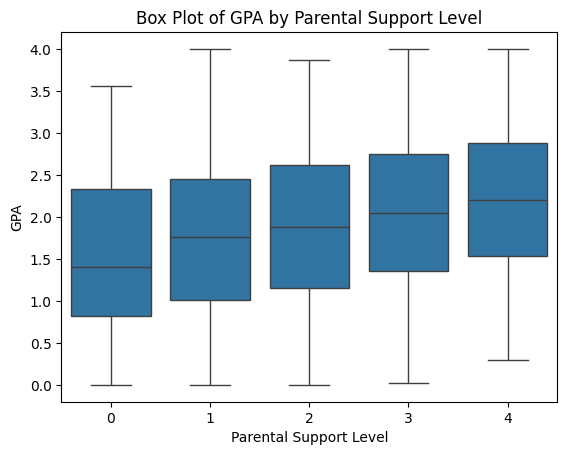

In [65]:
sns.boxplot(data=df, x='ParentalSupport', y='GPA')

# Show the plot
plt.xlabel('Parental Support Level')
plt.ylabel('GPA')
plt.title('Box Plot of GPA by Parental Support Level')
plt.show()

In [66]:
df['StudyTimeWeekly'] = np.ceil(df['StudyTimeWeekly'])

In [67]:
corr = df.corr()

<Axes: >

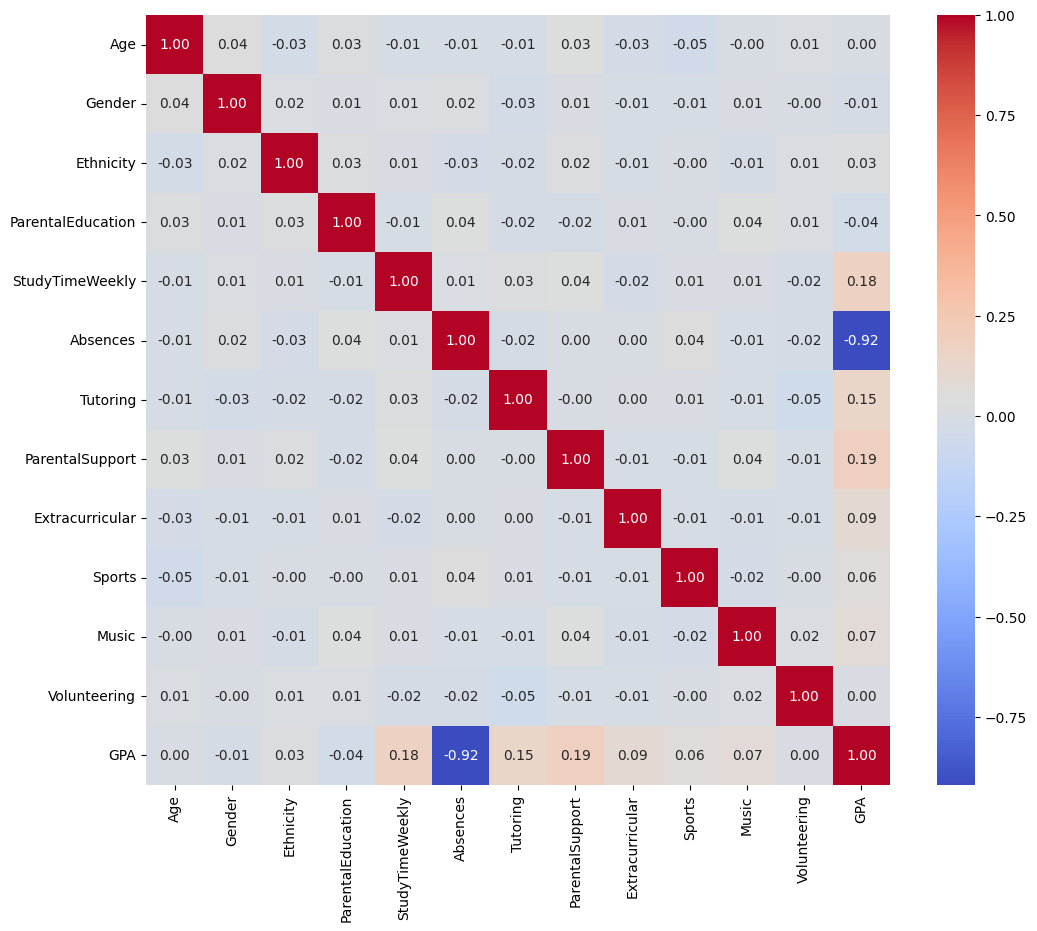

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [69]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2.0,20.0,7,1,2,0,0,1,0,2.93
1,18,0,0,1.0,16.0,0,0,1,0,0,0,0,3.04
2,15,0,2,3.0,5.0,26,0,2,0,0,0,0,0.11
3,17,1,0,3.0,11.0,14,0,3,1,0,0,0,2.05
4,17,1,0,2.0,5.0,17,1,3,0,0,0,0,1.29


Select the columns with weak correlation to drop them

In [70]:
# return the absloute value of the correlation to specify the weak columns
weak_corr = corr[abs(corr['GPA'])< 0.02].index
weak_corr

Index(['Age', 'Gender', 'Volunteering'], dtype='object')

In [71]:

df = df.drop(weak_corr,axis=1)

In [72]:
df

,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA
0,0,2.0,20.0,7,1,2,0,0,1,2.93
1,0,1.0,16.0,0,0,1,0,0,0,3.04
2,2,3.0,5.0,26,0,2,0,0,0,0.11
3,0,3.0,11.0,14,0,3,1,0,0,2.05
4,0,2.0,5.0,17,1,3,0,0,0,1.29
...,...,...,...,...,...,...,...,...,...,...
2387,0,3.0,11.0,2,0,4,1,0,0,3.46
2388,0,1.0,8.0,4,1,4,0,1,0,3.28
2389,0,2.0,7.0,20,0,2,0,0,0,1.14
2390,1,0.0,13.0,17,0,2,0,1,1,1.80


**splitting the data into training and testing**

In [73]:
from sklearn.model_selection import train_test_split
x = df.drop(['GPA'],axis=1)
y = df['GPA']


In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Models

### Import the Models and Metrics 

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix


### First Model `Decision Tree`

In [76]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [77]:
dt_predict = model.predict(x_test)

In [78]:
mae = mean_absolute_error(y_test,dt_predict)
print('the mean absolute error is',mae)
mse = mean_squared_error(y_test,dt_predict)
print('mean squared error is',mse)
dt_r2 = r2_score(y_test,dt_predict)
print('the R2 score is',dt_r2*100)

the mean absolute error is 0.27333947041978335
mean squared error is 0.11954589330874982
the R2 score is 85.54345405172185


### Second Model `SVM`

In [79]:
svm = SVR()
svm.fit(x_train,y_train)

SVR()

In [80]:
svm_predict = svm.predict(x_test)

In [81]:
mae = mean_absolute_error(y_test,svm_predict)
print('the mean absolute error is',mae)
mse = mean_squared_error(y_test,svm_predict)
print('mean squared error is',mse)
svm_r2 = r2_score(y_test,svm_predict)
print('the R2 score is',svm_r2*100)

the mean absolute error is 0.16019601549728493
mean squared error is 0.04131128452004913
the R2 score is 95.00427437265408


### Third Model `KNN`

In [82]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
knn_predict = knn.predict(x_test)

In [84]:
mae = mean_absolute_error(y_test,knn_predict)
print('the mean absolute error is',mae)
mse = mean_squared_error(y_test,knn_predict)
print('mean squared error is',mse)
knn_r2 = r2_score(y_test,knn_predict)
print('the R2 score is',knn_r2*100)

the mean absolute error is 0.21536812261699786
mean squared error is 0.07548141397899853
the R2 score is 90.87212032779608


### Forth Model `Random Forest`

In [85]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
rf_predict = rf.predict(x_test)

In [87]:
mae = mean_absolute_error(y_test,rf_predict)
print('the mean absolute error is',mae)
mse = mean_squared_error(y_test,rf_predict)
print('mean squared error is',mse)
rf_r2 = r2_score(y_test,rf_predict)
print('the R2 score is',rf_r2*100)

the mean absolute error is 0.18725674222871833
mean squared error is 0.0574506682451838
the R2 score is 93.05255745506237


### Comparing the Four Models

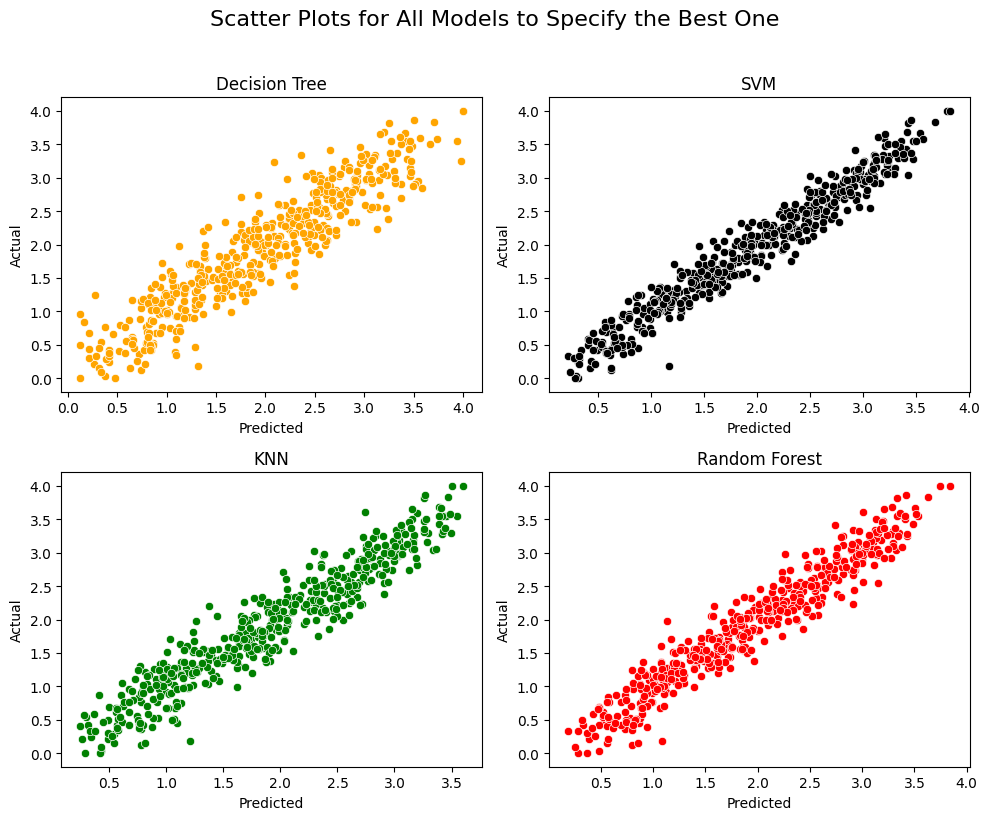

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.scatterplot(x= dt_predict, y= y_test, ax=axes[0, 0], color="orange")
sns.scatterplot(x=svm_predict, y=y_test, ax=axes[0, 1], color="black")
sns.scatterplot(x= knn_predict, y= y_test, ax=axes[1, 0], color="green")
sns.scatterplot(x= rf_predict, y=y_test, ax=axes[1, 1], color="red")

# Add titles to subplots
axes[0, 0].set_title("Decision Tree")
axes[0, 1].set_title("SVM")
axes[1, 0].set_title("KNN")
axes[1, 1].set_title("Random Forest")

axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

# Add a title for the whole figure
fig.suptitle("Scatter Plots for All Models to Specify the Best One", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

looks like the best model is `SVM`

we will make another gragh for better result

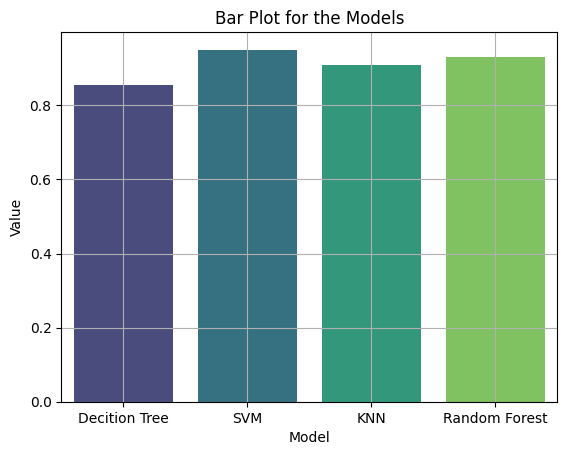

In [89]:
data = {
    'Model': ['Decition Tree', 'SVM', 'KNN', 'Random Forest'],
    'Value': [dt_r2, svm_r2, knn_r2, rf_r2]}

sns.barplot(x=data['Model'], y=data['Value'], palette='viridis')

# Customize the plot
plt.title('Bar Plot for the Models')
plt.xlabel('Model')
plt.ylabel('Value')

plt.grid(True)

# Show the plot
plt.show()

# **Now We're Sure That the Best Model is `SVM`**